
# Endpoint-corrected Hilbert transform (ECHT) phase estimation

This example shows how to causally estimate the phase of a signal using

Uses `meegkit.phase.ECHT()`.

## References
.. [1] Schreglmann, S. R., Wang, D., Peach, R. L., Li, J., Zhang, X., Latorre,
    A., ... & Grossman, N. (2021). Non-invasive suppression of essential tremor
    via phase-locked disruption of its temporal coherence. Nature
    communications, 12(1), 363.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import hilbert

from meegkit.phase import ECHT

rng = np.random.default_rng(38872)

plt.rcParams["axes.grid"] = True
plt.rcParams["grid.linestyle"] = ":"

## Build data
First, we generate a multi-component signal with amplitude and phase
modulations, as described in the paper [1]_.



In [2]:
f0 = 2

N = 500
sfreq = 100
time = np.linspace(0, N / sfreq, N)
X = np.cos(2 * np.pi * f0 * time - np.pi / 4)
phase_true = np.angle(hilbert(X))
X += rng.normal(0, 0.5, N)  # Add noise

### Compute phase and amplitude
We compute the Hilbert phase, as well as the phase obtained with the ECHT
filter.



In [3]:
phase_hilbert = np.angle(hilbert(X))  # Hilbert phase

# Compute ECHT-filtered signal
filt_BW = f0 / 2
l_freq = f0 - filt_BW / 2
h_freq = f0 + filt_BW / 2
echt = ECHT(l_freq, h_freq, sfreq)

Xf = echt.fit_transform(X)
phase_echt = np.angle(Xf)

### Visualize signal
Plot the results



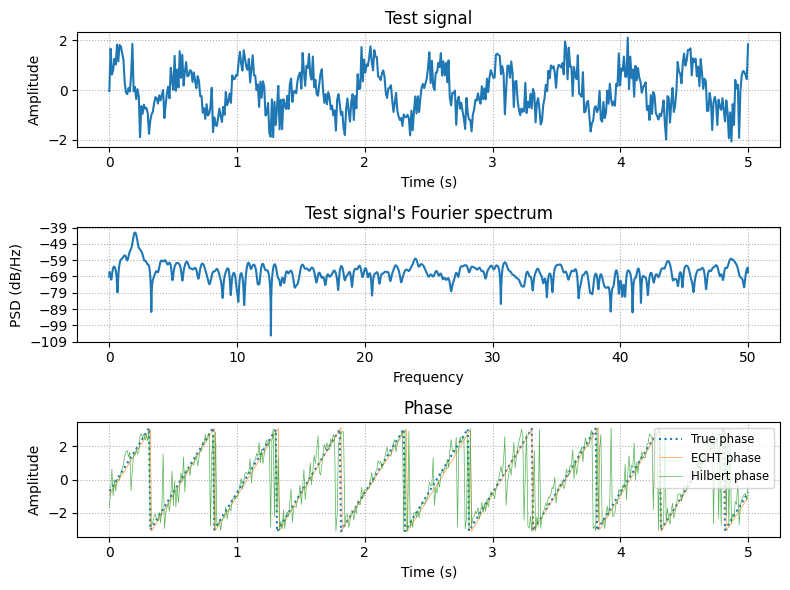

In [4]:
fig, ax = plt.subplots(3, 1, figsize=(8, 6))
ax[0].plot(time, X)
ax[0].set_xlabel("Time (s)")
ax[0].set_title("Test signal")
ax[0].set_ylabel("Amplitude")
ax[1].psd(X, Fs=sfreq, NFFT=2048*4, noverlap=sfreq)
ax[1].set_ylabel("PSD (dB/Hz)")
ax[1].set_title("Test signal's Fourier spectrum")
ax[2].plot(time, phase_true, label="True phase", ls=":")
ax[2].plot(time, phase_echt, label="ECHT phase", lw=.5, alpha=.8)
ax[2].plot(time, phase_hilbert, label="Hilbert phase", lw=.5, alpha=.8)
ax[2].set_title("Phase")
ax[2].set_ylabel("Amplitude")
ax[2].set_xlabel("Time (s)")
ax[2].legend(loc="upper right", fontsize="small")
plt.tight_layout()
plt.show()